In [ ]:
%cd ../src
from loader import * 
from datasets import *
from vis_utils import *
from utils import *
from stats import * 
from logs import logger
import logs,datasets,vis_utils,loader
logger.setLevel(logs.WARN)
%load_ext autoreload
%reload_ext autoreload

%autoreload 2
matplotlib.style.use('ggplot')
%matplotlib inline

from multiprocessing import Pool, cpu_count
import math
import psutil
import os
p=psutil.Process(os.getpid())
# p.nice(9)
utils.init_dev(utils.get_dev(ok=(3,)))
utils.allow_growth()



In [ ]:
vis=Visualizer(paranet_folder='tensor')
vis.tensor.head()

In [7]:
vis.tensor.tail()

model_type                                             resnet10  \
hiddens                                                       5   
dataset_type                                            cifar10   
optimizer                                     _lr_0.01_name_sgd   
name                                             Layer12/fc/act   
iter                                                              
12157         [[8.94934, -24.5864, -1.37546, 9.30752, 28.665...   
12549         [[9.21322, -24.6422, -1.82492, 8.86726, 28.717...   
12941         [[9.05481, -24.9766, -1.55547, 9.28861, 29.062...   
13333         [[9.19425, -24.8376, -1.91812, 8.90223, 29.255...   
13725         [[9.53312, -24.8821, -1.93791, 8.41909, 29.641...   

model_type                                                       \
hiddens                                                           
dataset_type                                                      
optimizer                                                         
name                                              Layer12/fc/in   
iter                                                              
12157         [[2.93939, 0.0, 24.449, 18.6124, 28.8581], [4....   
12549         [[2.77247, 0.0, 24.6044, 18.7585, 28.7592], [4...   
12941         [[2.85313, 0.0, 24.695, 18.8037, 29.1121], [4....   
13333         [[2.82514, 0.0, 24.7888, 18.9751, 29.0464], [5...   
13725         [[2.91684, 0.0, 25.0396, 19.1452, 29.1518], [5...   

model_type                                                       \
hiddens                                                           
dataset_type                                                      
optimizer                                                         
name                                        Layer12/fc/kernel_1   
iter                                                              
12157         [[0.363859, 1.10938, 1.09894, -0.838494, 0.426...   
12549         [[0.363538, 1.11036, 1.09883, -0.838271, 0.424...   
12941         [[0.363293, 1.11039, 1.09892, -0.837966, 0.422...   
13333         [[0.36306, 1.11115, 1.09882, -0.837881, 0.4215...   
13725         [[0.362994, 1.11187, 1.09899, -0.837776, 0.420...   

model_type                                                       \
hiddens                                                           
dataset_type                                                      
optimizer                                                         
name                                        Layer12/softmax/act   
iter                                                              
12157         [[4.34947e-13, 1.18588e-27, 1.42702e-17, 6.222...   
12549         [[3.21163e-13, 6.36065e-28, 5.16327e-18, 2.272...   
12941         [[2.47241e-13, 4.10655e-28, 6.09724e-18, 3.123...   
13333         [[2.21493e-13, 3.67736e-28, 3.30612e-18, 1.654...   
13725         [[2.31629e-13, 2.62088e-28, 2.4154e-18, 7.6029...   

model_type                                                       \
hiddens                                                     512   
dataset_type                                            cifar10   
optimizer                                     _lr_0.01_name_sgd   
name                                             Layer12/fc/act   
iter                                                              
12157         [[-4.10701, -18.5947, -1.9873, 1.21759, 21.209...   
12549         [[-4.13851, -18.688, -2.01271, 1.28431, 21.170...   
12941         [[-4.0332, -18.7614, -1.9587, 1.14118, 21.2573...   
13333         [[-4.0409, -18.8134, -1.99788, 1.15578, 21.364...   
13725         [[-4.01409, -18.9227, -1.99867, 1.11976, 21.37...   

model_type                                                       \
hiddens                                                           
dataset_type                                                      
optimizer                                                         
name                                      

In [8]:
# Layer12/fc/in -- 1 5 resnet
# Layer12/fc/in -- 9 13 vgg
tensor=vis.tensor.iloc[-1,5].copy()
tensor.shape

from model_utils import * 
dataset = Dataset('cifar10')
y_ori=np.where(dataset.y_test_ref)[1]

In [117]:
tensor=custom_sort(tensor,y_ori)

In [118]:
tensor = tensor / np.linalg.norm(tensor, axis=1)[:, np.newaxis]
angles = np.dot(tensor, tensor.T)
np.fill_diagonal(angles,np.nan)

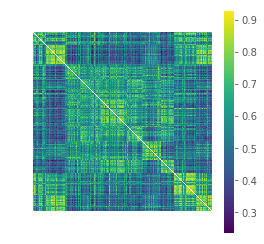

In [119]:
# angles=angles[:10,:10]
plt.matshow(angles)
plt.axis('off')
plt.colorbar()

In [ ]:
outs=vis.tensor.iloc[:,0:1].copy()
inps=vis.tensor.iloc[:,1:2].copy()

outs.iloc[-1,0]

outs=np.array(outs.values.tolist()).squeeze()
inps = np.array(inps.values.tolist()).squeeze()

outs.shape,outs[0].shape
outs[-1]

(array([  1.,   0.,   1.,   2.,   4.,  16.,  26.,  63.,  98.,  61.]),
 array([-2.83347869, -2.45688533, -2.08029196, -1.7036986 , -1.32710524,
        -0.95051187, -0.57391851, -0.19732515,  0.17926822,  0.55586158,
         0.93245494]),
 <a list of 10 Patch objects>)

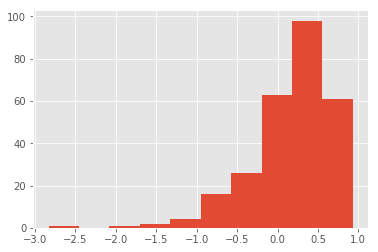

In [43]:
from model_utils import  * 
plt.hist(calc_margin(inps[-1],outs[-1]))
calc_margin(inps[-1],outs[-1])

In [66]:
inp,out=inps[0,...],outs[0,...]
dataset = Dataset('cifar10')
y_ori = np.where(dataset.y_test_ref)[1]
x_norm = np.linalg.norm(inp, axis=1)

out_ori = out[np.arange(out.shape[0]), y_ori]
out_t = out.copy()
out_t[np.arange(out.shape[0]), y_ori] = out_t.min(axis=1) - 1

out_max = np.nanmax(out_t, axis=1)
res=(out_ori - out_max) / x_norm


In [ ]:
marg = np.empty(outs.shape[:2])
for ind in np.ndindex(outs.shape[0]):
#     print ind
    marg[ind,:]=calc_margin(inps[ind] ,outs[ind]) 
    break
marg.shape

In [57]:
bak=marg.copy()

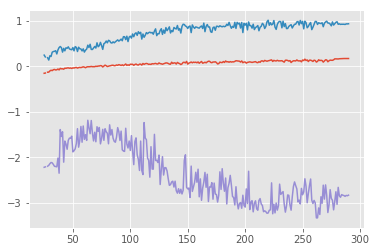

In [86]:
marg=bak.copy()

plt.plot(marg.mean(axis=-1))
plt.plot(marg.max(axis=-1))
plt.plot(marg.min(axis=-1))


In [112]:
res=[]
for t in marg:
    tt,data_range=np.histogram(t[~np.isnan(t)],range=[np.nanmin(marg),np.nanmax(marg)],bins=30)
    res.append(tt)
    
data_array=np.array(res)    
data_array.shape,data_range.shape

((291, 30), (31,))

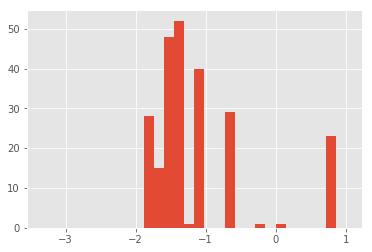

In [110]:
_=plt.hist(marg[0],range=[np.nanmin(marg),np.nanmax(marg)],bins=30)

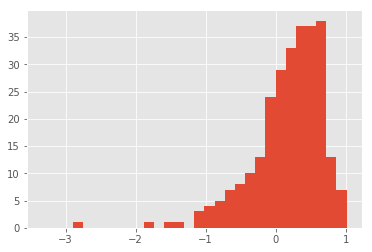

In [109]:
_=plt.hist(marg[-1],range=[np.nanmin(marg),np.nanmax(marg)],bins=30)

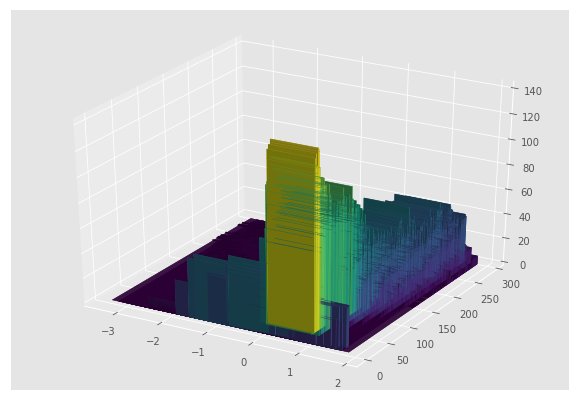

In [119]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#
x_data, y_data = np.meshgrid(data_range[:data_array.shape[1]], np.arange(data_array.shape[0]) )
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
dz=z_data
offset = dz + np.abs(dz.min())
from matplotlib import cm
import matplotlib.colors as colors
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
colors = cm.viridis(norm(fracs))
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data 
        , color=colors
        )
# plt.colorbar()

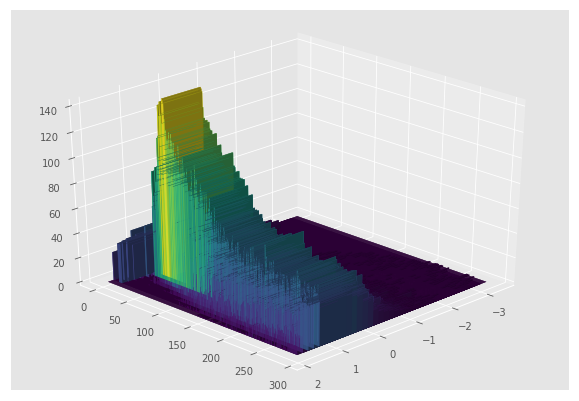

In [117]:
ax.view_init(30,45)
plt.draw()
fig

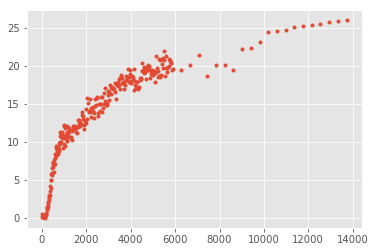

In [77]:
inps.shape
x_norms=np.linalg.norm(inps,axis=-1).mean(axis=-1)
x_norms=np.median(np.linalg.norm(inps,axis=-1),axis=-1)
plt.plot(vis.tensor.index,x_norms,'.')

In [ ]:
marg.shape

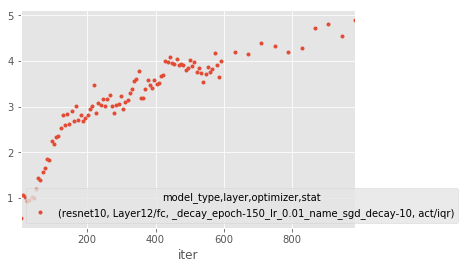

In [17]:
df.iloc[:,:1].plot(style='.')

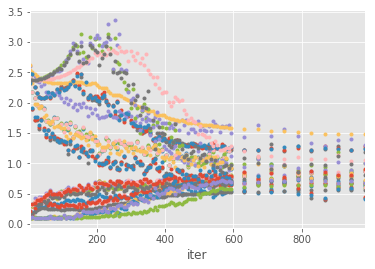

In [22]:
vis.perf_df.loc[:1000].plot(style='.',legend=False)